In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


importing data file

In [3]:
data = pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/Loan_default/XYZCorp_LendingData.txt', sep="\t"
                   ,header = 0)
dummy=pd.DataFrame.copy(data) 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.shape

(855969, 73)

displaying all column

In [5]:
pd.set_option('display.max_columns',None)

checking duplicate ids - no duplicate ids

In [6]:
print(any(dummy['member_id'].duplicated()))                    
print(any(dummy['id'].duplicated()))                     

False
False


dropping variables which are not required for modelling

In [7]:
dummy=dummy.drop(['id','member_id','emp_title','desc','title','addr_state','zip_code'],axis=1) 
#dropping variable that are not  relevent in modelling

policy_code is 1 for all - no variation<br>
pymnt_plan is y just for 5 - no variation

In [8]:
dummy=dummy.drop(['pymnt_plan','policy_code'],axis=1) 

Dropping grade variable as we already have sub grade [sub grade has more detailed info than grade]

In [9]:
dummy=dummy.drop(['grade'],axis=1) 

Dropping below variables as they have no  contribution to y=1

In [10]:
dummy=dummy.drop(['annual_inc_joint','dti_joint','verification_status_joint'],axis=1) 

In [11]:
dummy=dummy.drop(['open_acc_6m','open_il_6m','open_il_12m','open_il_24m',
                  'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m',
                  'open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl',
                  'inq_last_12m'],axis=1) 

Dropping variables with too many missing value > 50%

---



In [12]:
dummy=dummy.drop(['mths_since_last_delinq','mths_since_last_record','mths_since_last_major_derog'],axis=1) 

checking corelation between independent numeeric variables




In [13]:
print(dummy.corr(method ='pearson'))

                            loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
loan_amnt                    1.000000     0.999265         0.997601  0.142966   
funded_amnt                  0.999265     1.000000         0.998485  0.143116   
funded_amnt_inv              0.997601     0.998485         1.000000  0.143374   
int_rate                     0.142966     0.143116         0.143374  1.000000   
installment                  0.944870     0.945903         0.944149  0.130468   
annual_inc                   0.335209     0.335002         0.334356 -0.073825   
dti                          0.020189     0.020583         0.021489  0.078454   
delinq_2yrs                 -0.000739    -0.000424         0.000050  0.055400   
inq_last_6mths              -0.028928    -0.029279        -0.030462  0.231705   
open_acc                     0.198926     0.199432         0.200055 -0.011091   
pub_rec                     -0.082199    -0.081858        -0.081008  0.052596   
revol_bal                   

Loan_amnt, funded_amnt and funded_amnt_inv are highly corelated so keeping just one

In [14]:
dummy=dummy.drop(['funded_amnt','funded_amnt_inv'],axis=1) 

out_prncp_inv  and out_prncp are highly corelated so keeping just one<br>
total_pymnt  total_pymnt_inv and total_rec_prncp are highly corelated so keeping just one

In [15]:
dummy=dummy.drop(['out_prncp_inv','total_pymnt_inv','total_rec_prncp'],axis=1) 

Handling date variables

Removing insignificant Date variables

In [16]:
dummy=dummy.drop(['next_pymnt_d'],axis=1) 

Changing the format

In [17]:
dummy['issue_d'] = pd.to_datetime(dummy['issue_d'],infer_datetime_format=True, yearfirst=False)
#dummy['earliest_cr_line'] = pd.to_datetime(dummy['earliest_cr_line'],infer_datetime_format=True, yearfirst=False)
#dummy['last_credit_pull_d'] = pd.to_datetime(dummy['last_credit_pull_d'],infer_datetime_format=True, yearfirst=False)
#dummy['last_pymnt_d'] = pd.to_datetime(dummy['last_pymnt_d'],infer_datetime_format=True, yearfirst=False)
#%%
#converting to year
#dummy['earliest_cr_line'] = dummy['earliest_cr_line'].apply(lambda x: x.year)
#dummy['last_credit_pull_d'] = dummy['last_credit_pull_d'].apply(lambda x: x.year)
#dummy['last_pymnt_d'] = dummy['last_pymnt_d'].apply(lambda x: x.year)

Data edits

In [18]:
#removing spaces
dummy.emp_length=dummy.emp_length.replace('10+ years','ten') 
dummy.emp_length=dummy.emp_length.replace('2 years','two') 
dummy.emp_length=dummy.emp_length.replace('< 1 year','zero') 
dummy.emp_length=dummy.emp_length.replace('3 years','three') 
dummy.emp_length=dummy.emp_length.replace('1 year','one') 
dummy.emp_length=dummy.emp_length.replace('5 years','five') 
dummy.emp_length=dummy.emp_length.replace('4 years','four') 
dummy.emp_length=dummy.emp_length.replace('7 years','seven') 
dummy.emp_length=dummy.emp_length.replace('8 years','eight') 
dummy.emp_length=dummy.emp_length.replace('6 years','six') 
dummy.emp_length=dummy.emp_length.replace('9 years','nine') 

Data edits

In [ ]:
#dummy.home_ownership=dummy.home_ownership.replace('NONE','OTHER') 
#dummy.home_ownership=dummy.home_ownership.replace('ANY','OTHER') 

Data edits

In [19]:
#Source Verified and Verified both have same meaning
dummy.verification_status=dummy.verification_status.replace('Source Verified','Verified') 

Treating missing values

In [20]:
dummy.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
sub_grade                         0
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
purpose                           0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      446
total_acc                         0
initial_list_status               0
out_prncp                         0
total_pymnt                       0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_d                

In [21]:
dummy['emp_length'].fillna(dummy['emp_length'].mode()[0],inplace=True)

In [22]:
dummy['revol_util'].fillna(round(dummy['revol_util'].mean(),0),inplace=True) #rounding of to 0

In [23]:
dummy['tot_cur_bal'].fillna(round(dummy['tot_cur_bal'].mode()[0]),inplace=True) 
dummy['last_pymnt_d'].fillna((dummy['last_pymnt_d'].mode()[0]),inplace=True) 
dummy['last_credit_pull_d'].fillna((dummy['last_credit_pull_d'].mode()[0]),inplace=True) 


In [24]:
dummy['total_rev_hi_lim'].fillna(round(dummy['total_rev_hi_lim'].mode()[0]),inplace=True) #rounding of to 0


In [25]:
dummy['collections_12_mths_ex_med'].fillna(round(dummy['collections_12_mths_ex_med'].mean(),0),inplace=True) #rounding of to 0


In [26]:
dummy['tot_coll_amt'].fillna(round(dummy['tot_coll_amt'].mode()[0]),inplace=True) #rounding of to 0

Treating outliers 

Didn't found any significant differences in performance by treating outliers hence commented below codes

In [ ]:
#q1 = dummy['int_rate'].quantile(0.25) #first quartile value
#q3 = dummy['int_rate'].quantile(0.75) # third quartile value
#iqr = q3-q1 #Interquartile range
#low  = q1-1.5*iqr #acceptable range
#high = q3+1.5*iqr #acceptable range

In [ ]:
#dummy.loc[dummy["int_rate"] >high, "int_rate"] = high


In [ ]:
#q1 = dummy['installment'].quantile(0.25) #first quartile value
#q3 = dummy['installment'].quantile(0.75) # third quartile value
#iqr = q3-q1 #Interquartile range
#low  = q1-1.5*iqr #acceptable range
#high = q3+1.5*iqr #acceptable range

In [ ]:
#dummy.loc[dummy["installment"] >high, "installment"] = high

In [ ]:
#q1 = dummy['annual_inc'].quantile(0.25) #first quartile value
#q3 = dummy['annual_inc'].quantile(0.75) # third quartile value
#iqr = q3-q1 #Interquartile range
#low  = q1-1.5*iqr #acceptable range
#high = q3+1.5*iqr #acceptable range

In [ ]:
#dummy.loc[dummy["annual_inc"] >high, "annual_inc"] = high


In [ ]:
#q1 = dummy['dti'].quantile(0.25) #first quartile value
#q3 = dummy['dti'].quantile(0.75) # third quartile value
#iqr = q3-q1 #Interquartile range
#low  = q1-1.5*iqr #acceptable range
#high = q3+1.5*iqr #acceptable range
#dummy.loc[dummy["dti"] >high, "dti"] = high

In [ ]:
#q1 = dummy['open_acc'].quantile(0.25) #first quartile value
#q3 = dummy['open_acc'].quantile(0.75) # third quartile value
#iqr = q3-q1 #Interquartile range
#low  = q1-1.5*iqr #acceptable range
#high = q3+1.5*iqr #acceptable range
#dummy.loc[dummy["open_acc"] >high, "open_acc"] = high

In [ ]:
#q1 = dummy['revol_bal'].quantile(0.25) #first quartile value
#q3 = dummy['revol_bal'].quantile(0.75) # third quartile value
#iqr = q3-q1 #Interquartile range
#low  = q1-1.5*iqr #acceptable range
#high = q3+1.5*iqr #acceptable range
#dummy.loc[dummy["revol_bal"] >high, "revol_bal"] = high

In [ ]:
#q1 = dummy['total_acc'].quantile(0.25) #first quartile value
#q3 = dummy['total_acc'].quantile(0.75) # third quartile value
#iqr = q3-q1 #Interquartile range
#low  = q1-1.5*iqr #acceptable range
#high = q3+1.5*iqr #acceptable range
#dummy.loc[dummy["total_acc"] >high, "total_acc"] = high

In [ ]:
#q1 = dummy['out_prncp'].quantile(0.25) #first quartile value
#q3 = dummy['out_prncp'].quantile(0.75) # third quartile value
#iqr = q3-q1 #Interquartile range
#low  = q1-1.5*iqr #acceptable range
#high = q3+1.5*iqr #acceptable range
#dummy.loc[dummy["out_prncp"] >high, "out_prncp"] = high

In [ ]:
#q1 = dummy['total_pymnt'].quantile(0.25) #first quartile value
#q3 = dummy['total_pymnt'].quantile(0.75) # third quartile value
#iqr = q3-q1 #Interquartile range
#low  = q1-1.5*iqr #acceptable range
#high = q3+1.5*iqr #acceptable range
#dummy.loc[dummy["total_pymnt"] >high, "total_pymnt"] = high

In [ ]:
#q1 = dummy['total_rec_int'].quantile(0.25) #first quartile value
#q3 = dummy['total_rec_int'].quantile(0.75) # third quartile value
#iqr = q3-q1 #Interquartile range
#low  = q1-1.5*iqr #acceptable range
#high = q3+1.5*iqr #acceptable range
#dummy.loc[dummy["total_rec_int"] >high, "total_rec_int"] = high

In [ ]:
#q1 = dummy['last_pymnt_amnt'].quantile(0.25) #first quartile value
#q3 = dummy['last_pymnt_amnt'].quantile(0.75) # third quartile value
#iqr = q3-q1 #Interquartile range
#low  = q1-1.5*iqr #acceptable range
#high = q3+1.5*iqr #acceptable range
#dummy.loc[dummy["last_pymnt_amnt"] >high, "last_pymnt_amnt"] = high

In [ ]:
#q1 = dummy['revol_util'].quantile(0.25) #first quartile value
#q3 = dummy['revol_util'].quantile(0.75) # third quartile value
#iqr = q3-q1 #Interquartile range
#low  = q1-1.5*iqr #acceptable range
#high = q3+1.5*iqr #acceptable range
#dummy.loc[dummy["revol_util"] >high, "revol_util"] = high

In [ ]:
#q1 = dummy['tot_cur_bal'].quantile(0.25) #first quartile value
#q3 = dummy['tot_cur_bal'].quantile(0.75) # third quartile value
#iqr = q3-q1 #Interquartile range
#low  = q1-1.5*iqr #acceptable range
#high = q3+1.5*iqr #acceptable range
#dummy.loc[dummy["tot_cur_bal"] >high, "tot_cur_bal"] = high

In [ ]:
#q1 = dummy['total_rev_hi_lim'].quantile(0.25) #first quartile value
#q3 = dummy['total_rev_hi_lim'].quantile(0.75) # third quartile value
#iqr = q3-q1 #Interquartile range
#low  = q1-1.5*iqr #acceptable range
#high = q3+1.5*iqr #acceptable range
#dummy.loc[dummy["total_rev_hi_lim"] >high, "total_rev_hi_lim"] = high

In [27]:
dummy.isnull().sum()  #checking missing values


loan_amnt                     0
term                          0
int_rate                      0
installment                   0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_pymnt                   0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_d                  0
last_pymnt_amnt               0
last_credit_pull_d            0
collections_12_mths_ex_med    0
applicat

categorical data

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
colname=[]
for x in dummy.columns[:] :
    if dummy[x].dtype=='object':   #find all categorical value
        colname.append(x)   #add all categorical to list
#    else:
#      if x not in ['issue_d','default_ind']:
#        dummy[x]=scaler.fit_transform(np.array(dummy[x]).reshape(-1,1))
colname

['term',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [29]:
term        = pd.get_dummies(dummy.term       ,prefix='term'	, drop_first = True)
sub_grade    = pd.get_dummies(dummy.sub_grade   ,prefix='sub_grade'  , drop_first = True)
emp_length      = pd.get_dummies(dummy.emp_length     ,prefix='emp_length'    , drop_first = True)
home_ownership      = pd.get_dummies(dummy.home_ownership     ,prefix='home_ownership'    , drop_first = True)
verification_status        = pd.get_dummies(dummy.verification_status       ,prefix='verification_status'	, drop_first = True)
purpose      = pd.get_dummies(dummy.purpose     ,prefix='purpose'	, drop_first = True)
#earliest_cr_line       = pd.get_dummies(dummy.earliest_cr_line      ,prefix='earliest_cr_line'	, drop_first = True)
initial_list_status        = pd.get_dummies(dummy.initial_list_status       ,prefix='initial_list_status'	, drop_first = True)
#last_pymnt_d       = pd.get_dummies(dummy.last_pymnt_d      ,prefix='last_pymnt_d'	, drop_first = True)
#last_credit_pull_d        = pd.get_dummies(dummy.last_credit_pull_d       ,prefix='last_credit_pull_d'	, drop_first = True)
application_type    = pd.get_dummies(dummy.application_type   ,prefix='application_type'	, drop_first = True)

dummy= pd.concat([dummy,term,sub_grade,emp_length,home_ownership,verification_status,purpose
                    ,initial_list_status,application_type], axis = 1)

#removing categorical column
dummy = dummy.drop(['term', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'earliest_cr_line',
 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type'], axis = 1)


In [30]:
#randomizing the data
dummy = dummy.sample(frac = 1) 
dummy.shape


(855969, 92)

In [31]:
#df_DT=pd.DataFrame.copy(dummy) 
df=pd.DataFrame.copy(dummy) 

Splitting data 

In [32]:
from sklearn.model_selection import train_test_split
test_size = 0.1
seed = 11
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('default_ind',axis=1), df['default_ind'],
test_size = test_size, random_state = seed, stratify = df['default_ind'])


In [33]:
print(Y_train.value_counts())
print(Y_test.value_counts())


0    728552
1     41820
Name: default_ind, dtype: int64
0    80950
1     4647
Name: default_ind, dtype: int64


Standardizing numeric data

In [34]:
numlist=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'issue_d', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
'tot_cur_bal', 'total_rev_hi_lim']

from sklearn.preprocessing import StandardScaler, MinMaxScaler

for x in numlist :
  scaler = MinMaxScaler()
  scaler1=scaler.fit(np.array(X_train[x]).reshape(-1,1))
  X_train[x]=scaler1.transform(np.array(X_train[x]).reshape(-1,1))
  X_test[x]=scaler1.transform(np.array(X_test[x]).reshape(-1,1))



In [35]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(770372, 91)
(770372,)
(85597, 91)
(85597,)


logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression #linear_model library all linear model
#classifier=LogisticRegression() #classifier becomes a logistic model

In [37]:
#classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                 intercept_scaling=1, max_iter=100, multi_class='warn',
#                 n_jobs=None, penalty='l2', random_state=None, solver='warn',
#                 tol=0.0001, verbose=0, warm_start=False)
#classifier.fit(X_train,Y_train) #creating a model using fit passing x and y,model is created
classifier = LogisticRegression(random_state = 10, class_weight='balanced', max_iter = 1000)
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)  #model predicts y for testing data
#print(list(zip(Y_test,Y_pred)))
#print(classifier.coef_)
#print(classifier.intercept_)

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [39]:
print('classification report: ')
print(classification_report(Y_train,classifier.predict(X_train)))

classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    728552
           1       0.89      0.96      0.93     41820

    accuracy                           0.99    770372
   macro avg       0.94      0.98      0.96    770372
weighted avg       0.99      0.99      0.99    770372



In [40]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

[[80386   564]
 [  189  4458]]


In [41]:
print('classification report: ')
print(classification_report(Y_test,Y_pred))

classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     80950
           1       0.89      0.96      0.92      4647

    accuracy                           0.99     85597
   macro avg       0.94      0.98      0.96     85597
weighted avg       0.99      0.99      0.99     85597



In [42]:
acc=accuracy_score(Y_test,Y_pred)
print('accuracy of the model is:',acc)

accuracy of the model is: 0.9912029627206561


Roc curve

In [43]:
from sklearn import metrics

In [44]:
fpr, tpr,z = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)
 

0.9761806676765699
[0.         0.00696726 1.        ]
[0.        0.9593286 1.       ]


Text(0, 0.5, 'True Positive Rate')

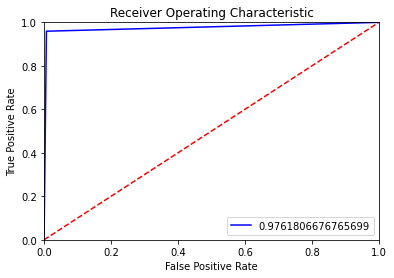

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

(0.0, 1.0)

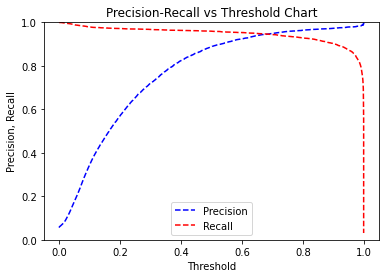

In [46]:
from sklearn.metrics import precision_recall_curve
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
precision, recall, threshold = precision_recall_curve(Y_test, preds)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(threshold, precision[: -1], "b--", label="Precision")
plt.plot(threshold, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1]) 

In [47]:
threshold = 0.7
pred = np.where(classifier.predict_proba(X_test)[:,1] >= threshold, 1, 0)
labels = [1, 0]
con_mat2 = confusion_matrix(Y_test, pred, labels = labels )
print(con_mat2)

from sklearn.metrics import accuracy_score
actual = Y_test
predicted = pred
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

[[ 4387   260]
 [  236 80714]]
Accuracy Score : 0.9942054043950138
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80950
           1       0.95      0.94      0.95      4647

    accuracy                           0.99     85597
   macro avg       0.97      0.97      0.97     85597
weighted avg       0.99      0.99      0.99     85597



Ramdom Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=50, n_estimators= 200, oob_score=True, class_weight={0: 1, 1: 10}, max_features=10,max_depth=10 )
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
score = model.score(X_test, Y_test)

print("Training")
print("Accuracy {0:.2f}%".format(100*accuracy_score(model.predict(X_train), Y_train)))
print(confusion_matrix(Y_train, model.predict(X_train)))
print(classification_report(Y_train, model.predict(X_train)))

print("testing")
print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, Y_test)))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))


Training
Accuracy 99.03%
[[722894   5658]
 [  1813  40007]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    728552
           1       0.88      0.96      0.91     41820

    accuracy                           0.99    770372
   macro avg       0.94      0.97      0.95    770372
weighted avg       0.99      0.99      0.99    770372

testing
Accuracy 98.89%
[[80257   693]
 [  260  4387]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     80950
           1       0.86      0.94      0.90      4647

    accuracy                           0.99     85597
   macro avg       0.93      0.97      0.95     85597
weighted avg       0.99      0.99      0.99     85597



In [49]:
!set GPU=1

Nueral network

In [50]:
# If you wish to use Tensorflow 1.X run the following line and then restart runtime
# %tensorflow_version 1.x 
# You'll need to change your import statements from tensorflow.keras to keras
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Dense(100,input_dim=91 ,activation='relu',kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(100,activation='relu',kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(100,activation='relu',kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(1, activation = "sigmoid"))


In [51]:
# Start Training Our Classifier 
#batch_size = 256
#epochs = 100
INIT_LR = 0.00001

batch_size = 512
epochs = 500

class_weight = {0: 1,
                1: 4}

opt = Adam(lr=INIT_LR, decay=INIT_LR / epochs)
model.compile(optimizer= opt,loss = "binary_crossentropy",metrics = ["accuracy"])

history = model.fit(X_train,
                    Y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                     class_weight=class_weight,
                    validation_data = (X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/500
1505/1505 [==============================] - 12s 6ms/step - loss: 4.3071 - accuracy: 0.4767 - val_loss: 3.9943 - val_accuracy: 0.0558
Epoch 2/500
1505/1505 [==============================] - 7s 5ms/step - loss: 3.9268 - accuracy: 0.5151 - val_loss: 3.5355 - val_accuracy: 0.0803
Epoch 3/500
1505/1505 [==============================] - 7s 5ms/step - loss: 3.6116 - accuracy: 0.5547 - val_loss: 3.1811 - val_accuracy: 0.2448
Epoch 4/500
1505/1505 [==============================] - 7s 5ms/step - loss: 3.3305 - accuracy: 0.5922 - val_loss: 2.9017 - val_accuracy: 0.5140
Epoch 5/500
1505/1505 [==============================] - 7s 5ms/step - loss: 3.0828 - accuracy: 0.6298 - val_loss: 2.6608 - val_accuracy: 0.7574
Epoch 6/500
1505/1505 [==============================] - 7s 5ms/step - loss: 2.8616 - accuracy: 0.6651 - val_loss: 2.4523 - val_accuracy: 0.8800
Epoch 7/500
1505/1505 [==============================] - 7s 5ms/step - loss: 2.6593 - accuracy: 0.6999 - val_loss: 2.2685 - val_a

In [52]:
predictions = model.predict(X_train)
predictions = (predictions > 0.5)

print(confusion_matrix(Y_train, predictions))
print(classification_report(Y_train, predictions))

[[728346    206]
 [  1363  40457]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    728552
           1       0.99      0.97      0.98     41820

    accuracy                           1.00    770372
   macro avg       1.00      0.98      0.99    770372
weighted avg       1.00      1.00      1.00    770372



In [53]:
predictions = model.predict(X_test)
predictions = (predictions > 0.50)

print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[80922    28]
 [  171  4476]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80950
           1       0.99      0.96      0.98      4647

    accuracy                           1.00     85597
   macro avg       1.00      0.98      0.99     85597
weighted avg       1.00      1.00      1.00     85597



0.9761806676765699
[0.         0.00696726 1.        ]
[0.        0.9593286 1.       ]


Text(0, 0.5, 'True Positive Rate')

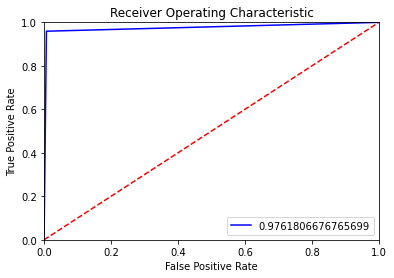

In [56]:
fpr, tpr,z = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)
 
 
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')



(0.0, 1.0)

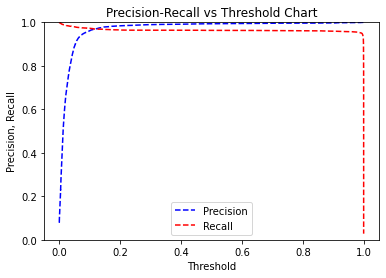

In [57]:

from sklearn.metrics import precision_recall_curve
probs = model.predict(X_test)
preds = probs
precision, recall, threshold = precision_recall_curve(Y_test, preds)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(threshold, precision[: -1], "b--", label="Precision")
plt.plot(threshold, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1]) 




In [61]:
threshold = 0.5
pred = np.where(model.predict(X_test) >= threshold, 1, 0)
labels = [1, 0]
con_mat2 = confusion_matrix(Y_test, pred, labels = labels )
print(con_mat2)

from sklearn.metrics import accuracy_score
actual = Y_test
predicted = pred
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

[[ 4476   171]
 [   28 80922]]
Accuracy Score : 0.9976751521665479
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80950
           1       0.99      0.96      0.98      4647

    accuracy                           1.00     85597
   macro avg       1.00      0.98      0.99     85597
weighted avg       1.00      1.00      1.00     85597



XGBOOST

In [62]:
from xgboost import XGBClassifier


In [63]:
modelXGB = XGBClassifier(n_estimators=200, 
              max_depth=10,scale_pos_weight=int(728552/(41820*10))) 
modelXGB.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
predictions = modelXGB.predict(X_train)
print(confusion_matrix(Y_train, predictions))
print(classification_report(Y_train, predictions))

[[728552      0]
 [    10  41810]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    728552
           1       1.00      1.00      1.00     41820

    accuracy                           1.00    770372
   macro avg       1.00      1.00      1.00    770372
weighted avg       1.00      1.00      1.00    770372



In [65]:
predictions = modelXGB.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[80950     0]
 [   97  4550]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80950
           1       1.00      0.98      0.99      4647

    accuracy                           1.00     85597
   macro avg       1.00      0.99      0.99     85597
weighted avg       1.00      1.00      1.00     85597



In [66]:
#Saved weights
import pickle
file_name = "/content/gdrive/My Drive/Colab Notebooks/Loan_default/xgb_reg.pkl"

# save
#pickle.dump(modelXGB, open(file_name, "wb"))


In [67]:

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

In [68]:
predictions = xgb_model_loaded.predict(X_train)
print(confusion_matrix(Y_train, predictions))
print(classification_report(Y_train, predictions))

[[728552      0]
 [    88  41732]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    728552
           1       1.00      1.00      1.00     41820

    accuracy                           1.00    770372
   macro avg       1.00      1.00      1.00    770372
weighted avg       1.00      1.00      1.00    770372



In [69]:
predictions = xgb_model_loaded.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[80950     0]
 [   12  4635]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80950
           1       1.00      1.00      1.00      4647

    accuracy                           1.00     85597
   macro avg       1.00      1.00      1.00     85597
weighted avg       1.00      1.00      1.00     85597

